# Fintech Sector Portfolio Analysis

## Table of Contents 
1. [Collect and Clean Data](#Collect-and-Clean-Data)
    * [Create a function to generate a daily returns DataFrame for a given list of stocks within a fintech sector](#Create-a-function-to-generate-a-daily-returns-DataFrame-for-a-given-list-of-stocks-within-a-fintech-sector)
    * [Get 5 years of data for Paytech sector (PayPal, Square, and MasterCard)](#Get-5-years-of-data-for-Paytech-sector---PayPal,-Square,-and-MasterCard)
    * [Get 5 years of data for Lending sector (LendingTree, LendingClub, and Black Knight)](#Get-5-years-of-data-for-Lending-sector---LendingTree,-LendingClub,-and-Black-Knight)
    * [Get 5 years of data for Banking sector - Fiserv, Jack Henry & Associates, and FIS (Fidelity National Information Services)](#Get-5-years-of-data-for-Banking-sector---Fiserv,-Jack-Henry-&-Associates,-and-FIS-(Fidelity-National-Information-Services))
2. [Data Analysis and Calculations](#Data-Analysis-and-Calculations)
    * [Plot the daily returns in composite graphs for each sector](#Plot-the-daily-returns-in-composite-graphs-for-each-sector)
    * [Plot the spread of the daily returns using a box plot](#Plot-the-spread-of-the-daily-returns-using-a-box-plot)
    * [Calculate and plot the cumulative returns of each sector](#Calculate-and-plot-the-cumulative-returns-of-each-sector)
    * [Calculate and plot 21-day rolling average and standard deviation for each sector](#Calculate-and-plot-21-Day-rolling-average-and-standard-deviation-for-each-sector)
    * [Analyze trend from Banking and Lending to Paytech](#Analyze-trend-from-Banking-and-Lending-to-Paytech)
    * [Analyze the risk-return profile of each stock with their Sharpe ratios](#Analyze-the-risk-return-profile-of-each-stock-with-their-Sharpe-ratios)
3. [Monte Carlo Simulations](#Monte-Carlo-Simulations)
    * [Reformat sector DataFrames to be usable by MCSimulation module](#Reformat-sector-DataFrames-to-be-usable-by-MCSimulation-module)
    * [Run 5 year Monte Carlo simulations with even weight distributions](#Run-5-year-Monte-Carlo-simulations-with-even-weight-distributions)
    * [Run 5 year Monte Carlo simulations with uneven weight distributions (higher percentages for higher Sharpe ratios)](#Run-5-year-Monte-Carlo-simulations-with-uneven-weight-distributions-(higher-percentages-for-higher-Sharpe-ratios))
    * [Run 1 year Monte Carlo simulations with even weight distributions](#Run-1-year-Monte-Carlo-simulations-with-even-weight-distributions)
    * [Run 1 year Monte Carlo simulations with uneven weight distributions (higher percentages for higher Sharpe ratios)](#Run-1-year-Monte-Carlo-simulations-with-uneven-weight-distributions-(higher-percentages-for-higher-Sharpe-ratios))
4. [Analyze the 95 percent confidence intervals of all the Monte Carlo simulations assuming 10,000 dollar current value of each portfolio](#Analyze-the-95-percent-confidence-intervals-of-all-the-Monte-Carlo-simulations-assuming-a-$10,000-dollar-current-value-of-each-portfolio)
5. [Construct a custom portfolio with best performing stocks](#Construct-a-custom-portfolio-with-best-performing-stocks)
    * [Analyze the annualized average return and cumulative returns for the average daily returns of the portfolio](#Analyze-the-annualized-average-return-and-cumulative-returns-for-the-average-daily-returns-of-the-portfolio)
    * [Monte Carlo simulations using the custom portfolio](#Monte-Carlo-simulations-using-the-custom-portfolio)
    * [95 percent confidence intervals using the custom portfolio](#95-percent-confidence-intervals-using-the-custom-portfolio)

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import hvplot.pandas
from MCForecastTools import MCSimulation

import warnings
warnings.filterwarnings("ignore")

## Collect and Clean Data

### Create a function to generate a daily returns DataFrame for a given list of stocks within a fintech sector

In [2]:
def get_daily_returns_df(yf_tickers, ticker_names, period):
    """
    Returns a pandas DataFrame where each column are daily returns for the provided stocks. 
    Prints out each step of the data
    
    Parameters
    ----------
    yf_tickers: yfinance.Tickers()
        a yfinance Tickers object containing desired stocks 
    ticker_names: list(str)
        a python list of ticker strings, assumes that the length of the list is equal to the number of stocks in yf_tickers
    period: str
        a python string that correlates to yfinance.Tickers() period parameter (ex: '1d', '2m', '5y', etc.)
        
    Returns
    -------
    pandas.DataFrame
        concatenated DataFrame with each stock's daily return data
    
    """

    stock_dfs = []
    
    # create pandas DataFrames for each stock in the yf ticker object, based on provided time period
    for ticker in ticker_names:
        stock_df = yf_tickers.tickers[ticker].history(period=period)
        
        # verify that the correct data was pulled
        print(f'{ticker} DataFame')
        display(stock_df.head())
        display(stock_df.tail())
        
        # select only the close values for daily returns
        stock_df = stock_df[['Close']]
        
        stock_dfs.append(stock_df)
        
    print('\n')
    
    # concat the list of closing price DataFrames
    daily_returns_df = pd.concat(stock_dfs, axis=1)
    daily_returns_df.columns = ticker_names

    # print out the concatenated DataFrame to verify correct closing price data
    print(f'Closing price DataFrame for {ticker_names}')
    display(daily_returns_df.head())
    display(daily_returns_df.tail())
    print('\n')    

    # convert closing prices to daily returns 
    daily_returns_df = daily_returns_df.pct_change().dropna()

    # print final daily returns DataFrame
    print(f'Daily returns DataFrame for {ticker_names}')
    display(daily_returns_df.head())
    display(daily_returns_df.tail())

    return daily_returns_df

In [3]:
# definte stock tickers for each sector 
paytech_ticker_names = ['PYPL', 'SQ', 'MA']
lending_ticker_names = ['TREE', 'LC', 'BKI']
banking_ticker_names = ['FISV', 'JKHY', 'FIS']

### Get 5 years of data for Paytech sector - PayPal, Square, and MasterCard

In [4]:
# create yfinance ticker object for paytech stocks
paytech_tickers = yf.Tickers('pypl sq ma')

# use tickers and 5 year period to get 5 years of paytech stock data 
paytech_daily_returns =  get_daily_returns_df(paytech_tickers, paytech_ticker_names, '5y')

PYPL DataFame


Open       High        Low      Close  \
Date                                                                    
2017-12-11 00:00:00-05:00  72.959999  73.680000  72.559998  73.290001   
2017-12-12 00:00:00-05:00  73.449997  74.309998  73.000000  73.620003   
2017-12-13 00:00:00-05:00  74.080002  75.419998  73.769997  74.089996   
2017-12-14 00:00:00-05:00  74.500000  75.529999  74.199997  74.260002   
2017-12-15 00:00:00-05:00  74.820000  75.870003  73.510002  75.650002   

                             Volume  Dividends  Stock Splits  
Date                                                          
2017-12-11 00:00:00-05:00   6421900          0             0  
2017-12-12 00:00:00-05:00   6573500          0             0  
2017-12-13 00:00:00-05:00   7196400          0             0  
2017-12-14 00:00:00-05:00   7519600          0             0  
2017-12-15 00:00:00-05:00  12543900          0             0

Open       High        Low      Close  \
Date                                                                    
2022-12-05 00:00:00-05:00  74.010002  75.489998  72.824997  73.620003   
2022-12-06 00:00:00-05:00  73.379997  73.839996  71.349998  72.230003   
2022-12-07 00:00:00-05:00  71.680000  75.339996  71.010002  74.419998   
2022-12-08 00:00:00-05:00  75.089996  75.860001  73.790001  74.220001   
2022-12-09 00:00:00-05:00  73.949997  74.589996  73.339996  73.570000   

                             Volume  Dividends  Stock Splits  
Date                                                          
2022-12-05 00:00:00-05:00  18317200          0             0  
2022-12-06 00:00:00-05:00  14692600          0             0  
2022-12-07 00:00:00-05:00  24695600          0             0  
2022-12-08 00:00:00-05:00  13151100          0             0  
2022-12-09 00:00:00-05:00  11776500          0             0

SQ DataFame


Open       High        Low      Close  \
Date                                                                    
2017-12-11 00:00:00-05:00  38.150002  38.680000  37.700001  38.299999   
2017-12-12 00:00:00-05:00  38.070000  39.639999  37.930000  38.080002   
2017-12-13 00:00:00-05:00  38.169998  38.450001  36.070000  36.189999   
2017-12-14 00:00:00-05:00  35.849998  37.540001  35.799999  37.009998   
2017-12-15 00:00:00-05:00  37.299999  37.653000  36.869999  37.029999   

                             Volume  Dividends  Stock Splits  
Date                                                          
2017-12-11 00:00:00-05:00  15780200          0             0  
2017-12-12 00:00:00-05:00  18834100          0             0  
2017-12-13 00:00:00-05:00  25376200          0             0  
2017-12-14 00:00:00-05:00  20939500          0             0  
2017-12-15 00:00:00-05:00  12932000          0             0

Open       High        Low      Close  \
Date                                                                    
2022-12-05 00:00:00-05:00  67.400002  67.860001  62.400002  63.139999   
2022-12-06 00:00:00-05:00  63.119999  63.879002  60.200001  61.299999   
2022-12-07 00:00:00-05:00  60.830002  61.849998  59.625000  61.070000   
2022-12-08 00:00:00-05:00  61.599998  63.700001  60.500000  63.369999   
2022-12-09 00:00:00-05:00  63.099998  65.830002  63.099998  64.599998   

                             Volume  Dividends  Stock Splits  
Date                                                          
2022-12-05 00:00:00-05:00  12610900          0             0  
2022-12-06 00:00:00-05:00   9408900          0             0  
2022-12-07 00:00:00-05:00   8734800          0             0  
2022-12-08 00:00:00-05:00   7849800          0             0  
2022-12-09 00:00:00-05:00   8414800          0             0

MA DataFame


Open        High         Low       Close  \
Date                                                                        
2017-12-11 00:00:00-05:00  146.207661  147.210149  146.090871  146.850037   
2017-12-12 00:00:00-05:00  146.801380  149.623916  146.587255  148.426773   
2017-12-13 00:00:00-05:00  148.426791  149.341686  147.609230  147.638428   
2017-12-14 00:00:00-05:00  147.862266  149.448734  147.726006  147.871994   
2017-12-15 00:00:00-05:00  148.572751  149.516844  146.830568  149.302719   

                            Volume  Dividends  Stock Splits  
Date                                                         
2017-12-11 00:00:00-05:00  3394800        0.0             0  
2017-12-12 00:00:00-05:00  3360300        0.0             0  
2017-12-13 00:00:00-05:00  3618700        0.0             0  
2017-12-14 00:00:00-05:00  3016700        0.0             0  
2017-12-15 00:00:00-05:00  5067300        0.0             0

Open        High         Low       Close  \
Date                                                                        
2022-12-05 00:00:00-05:00  356.000000  358.899994  354.450012  356.089996   
2022-12-06 00:00:00-05:00  353.820007  355.000000  344.350006  347.529999   
2022-12-07 00:00:00-05:00  346.880005  347.850006  341.470001  347.420013   
2022-12-08 00:00:00-05:00  350.000000  352.170013  347.220001  351.170013   
2022-12-09 00:00:00-05:00  348.399994  352.769989  347.359985  348.829987   

                            Volume  Dividends  Stock Splits  
Date                                                         
2022-12-05 00:00:00-05:00  2202500        0.0             0  
2022-12-06 00:00:00-05:00  2353300        0.0             0  
2022-12-07 00:00:00-05:00  2454300        0.0             0  
2022-12-08 00:00:00-05:00  1998600        0.0             0  
2022-12-09 00:00:00-05:00  2301100        0.0             0



Closing price DataFrame for ['PYPL', 'SQ', 'MA']


PYPL         SQ          MA
Date                                                       
2017-12-11 00:00:00-05:00  73.290001  38.299999  146.850037
2017-12-12 00:00:00-05:00  73.620003  38.080002  148.426773
2017-12-13 00:00:00-05:00  74.089996  36.189999  147.638428
2017-12-14 00:00:00-05:00  74.260002  37.009998  147.871994
2017-12-15 00:00:00-05:00  75.650002  37.029999  149.302719

PYPL         SQ          MA
Date                                                       
2022-12-05 00:00:00-05:00  73.620003  63.139999  356.089996
2022-12-06 00:00:00-05:00  72.230003  61.299999  347.529999
2022-12-07 00:00:00-05:00  74.419998  61.070000  347.420013
2022-12-08 00:00:00-05:00  74.220001  63.369999  351.170013
2022-12-09 00:00:00-05:00  73.570000  64.599998  348.829987



Daily returns DataFrame for ['PYPL', 'SQ', 'MA']


PYPL        SQ        MA
Date                                                   
2017-12-12 00:00:00-05:00  0.004503 -0.005744  0.010737
2017-12-13 00:00:00-05:00  0.006384 -0.049632 -0.005311
2017-12-14 00:00:00-05:00  0.002295  0.022658  0.001582
2017-12-15 00:00:00-05:00  0.018718  0.000540  0.009675
2017-12-18 00:00:00-05:00 -0.004362  0.019444 -0.001825

PYPL        SQ        MA
Date                                                   
2022-12-05 00:00:00-05:00 -0.013930 -0.073922 -0.011026
2022-12-06 00:00:00-05:00 -0.018881 -0.029142 -0.024039
2022-12-07 00:00:00-05:00  0.030320 -0.003752 -0.000316
2022-12-08 00:00:00-05:00 -0.002687  0.037662  0.010794
2022-12-09 00:00:00-05:00 -0.008758  0.019410 -0.006664

### Get 5 years of data for Lending sector - LendingTree, LendingClub, and Black Knight

In [5]:
# create yfinance ticker object for lending stocks
lending_tickers = yf.Tickers('tree lc bki')

# use tickers and 5 year period to get 5 years of lending stock data 
lending_daily_returns =  get_daily_returns_df(lending_tickers, lending_ticker_names, '5y')

TREE DataFame


Open        High         Low       Close  \
Date                                                                        
2017-12-11 00:00:00-05:00  316.049988  319.950012  307.750000  308.899994   
2017-12-12 00:00:00-05:00  308.850006  316.450012  307.250000  312.649994   
2017-12-13 00:00:00-05:00  316.000000  326.500000  308.950012  325.600006   
2017-12-14 00:00:00-05:00  329.549988  340.049988  325.149994  334.700012   
2017-12-15 00:00:00-05:00  335.049988  347.750000  332.299988  344.350006   

                           Volume  Dividends  Stock Splits  
Date                                                        
2017-12-11 00:00:00-05:00  257800          0             0  
2017-12-12 00:00:00-05:00  171200          0             0  
2017-12-13 00:00:00-05:00  300500          0             0  
2017-12-14 00:00:00-05:00  406100          0             0  
2017-12-15 00:00:00-05:00  848900          0             0

Open       High        Low      Close  Volume  \
Date                                                                            
2022-12-05 00:00:00-05:00  24.700001  25.370001  23.900000  23.980000  200000   
2022-12-06 00:00:00-05:00  23.930000  23.930000  22.549999  22.600000  262700   
2022-12-07 00:00:00-05:00  22.500000  22.590000  21.280001  21.610001  307200   
2022-12-08 00:00:00-05:00  21.930000  22.160000  21.059999  21.790001  222300   
2022-12-09 00:00:00-05:00  21.120001  21.940001  20.879999  21.020000  259300   

                           Dividends  Stock Splits  
Date                                                
2022-12-05 00:00:00-05:00          0             0  
2022-12-06 00:00:00-05:00          0             0  
2022-12-07 00:00:00-05:00          0             0  
2022-12-08 00:00:00-05:00          0             0  
2022-12-09 00:00:00-05:00          0             0

LC DataFame


Open       High    Low      Close    Volume  \
Date                                                                          
2017-12-11 00:00:00-05:00  19.525000  19.850000  17.00  19.450001  10947060   
2017-12-12 00:00:00-05:00  19.650000  22.100000  19.65  21.049999   5742200   
2017-12-13 00:00:00-05:00  21.100000  21.250000  18.85  20.100000   2983500   
2017-12-14 00:00:00-05:00  19.950001  20.700001  19.65  19.950001   1281300   
2017-12-15 00:00:00-05:00  20.000000  20.500000  19.50  20.150000   2226680   

                           Dividends  Stock Splits  
Date                                                
2017-12-11 00:00:00-05:00          0           0.0  
2017-12-12 00:00:00-05:00          0           0.0  
2017-12-13 00:00:00-05:00          0           0.0  
2017-12-14 00:00:00-05:00          0           0.0  
2017-12-15 00:00:00-05:00          0           0.0

Open   High   Low  Close   Volume  Dividends  \
Date                                                                       
2022-12-05 00:00:00-05:00  10.16  10.43  9.85   9.88  1283600          0   
2022-12-06 00:00:00-05:00   9.88   9.90  9.34   9.56  1425400          0   
2022-12-07 00:00:00-05:00   9.47   9.61  9.36   9.48   969100          0   
2022-12-08 00:00:00-05:00   9.58   9.83  9.39   9.46   912400          0   
2022-12-09 00:00:00-05:00   9.40   9.56  9.34   9.39   747200          0   

                           Stock Splits  
Date                                     
2022-12-05 00:00:00-05:00           0.0  
2022-12-06 00:00:00-05:00           0.0  
2022-12-07 00:00:00-05:00           0.0  
2022-12-08 00:00:00-05:00           0.0  
2022-12-09 00:00:00-05:00           0.0

BKI DataFame


Open       High        Low      Close  \
Date                                                                    
2017-12-11 00:00:00-05:00  45.500000  45.900002  45.275002  45.599998   
2017-12-12 00:00:00-05:00  45.500000  45.549999  45.049999  45.099998   
2017-12-13 00:00:00-05:00  45.099998  45.549999  44.849998  45.400002   
2017-12-14 00:00:00-05:00  45.250000  45.799999  44.875000  45.250000   
2017-12-15 00:00:00-05:00  45.299999  45.599998  44.650002  45.049999   

                            Volume  Dividends  Stock Splits  
Date                                                         
2017-12-11 00:00:00-05:00   506100          0             0  
2017-12-12 00:00:00-05:00   240900          0             0  
2017-12-13 00:00:00-05:00   595400          0             0  
2017-12-14 00:00:00-05:00   976300          0             0  
2017-12-15 00:00:00-05:00  1381000          0             0

Open       High        Low      Close  Volume  \
Date                                                                            
2022-12-05 00:00:00-05:00  60.950001  61.000000  59.808998  59.970001  745000   
2022-12-06 00:00:00-05:00  59.860001  60.040001  59.130001  59.290001  592800   
2022-12-07 00:00:00-05:00  59.180000  59.709999  57.799999  59.080002  616300   
2022-12-08 00:00:00-05:00  58.919998  60.520000  58.657001  60.259998  555500   
2022-12-09 00:00:00-05:00  60.130001  60.950001  59.830002  59.889999  551800   

                           Dividends  Stock Splits  
Date                                                
2022-12-05 00:00:00-05:00          0             0  
2022-12-06 00:00:00-05:00          0             0  
2022-12-07 00:00:00-05:00          0             0  
2022-12-08 00:00:00-05:00          0             0  
2022-12-09 00:00:00-05:00          0             0



Closing price DataFrame for ['TREE', 'LC', 'BKI']


TREE         LC        BKI
Date                                                       
2017-12-11 00:00:00-05:00  308.899994  19.450001  45.599998
2017-12-12 00:00:00-05:00  312.649994  21.049999  45.099998
2017-12-13 00:00:00-05:00  325.600006  20.100000  45.400002
2017-12-14 00:00:00-05:00  334.700012  19.950001  45.250000
2017-12-15 00:00:00-05:00  344.350006  20.150000  45.049999

TREE    LC        BKI
Date                                                 
2022-12-05 00:00:00-05:00  23.980000  9.88  59.970001
2022-12-06 00:00:00-05:00  22.600000  9.56  59.290001
2022-12-07 00:00:00-05:00  21.610001  9.48  59.080002
2022-12-08 00:00:00-05:00  21.790001  9.46  60.259998
2022-12-09 00:00:00-05:00  21.020000  9.39  59.889999



Daily returns DataFrame for ['TREE', 'LC', 'BKI']


TREE        LC       BKI
Date                                                   
2017-12-12 00:00:00-05:00  0.012140  0.082262 -0.010965
2017-12-13 00:00:00-05:00  0.041420 -0.045131  0.006652
2017-12-14 00:00:00-05:00  0.027948 -0.007463 -0.003304
2017-12-15 00:00:00-05:00  0.028832  0.010025 -0.004420
2017-12-18 00:00:00-05:00  0.023668  0.027295 -0.006659

TREE        LC       BKI
Date                                                   
2022-12-05 00:00:00-05:00 -0.040032 -0.029470 -0.023131
2022-12-06 00:00:00-05:00 -0.057548 -0.032389 -0.011339
2022-12-07 00:00:00-05:00 -0.043805 -0.008368 -0.003542
2022-12-08 00:00:00-05:00  0.008329 -0.002110  0.019973
2022-12-09 00:00:00-05:00 -0.035337 -0.007400 -0.006140

### Get 5 years of data for Banking sector - Fiserv, Jack Henry & Associates, and FIS (Fidelity National Information Services)

In [6]:
# create yfinance ticker object for banking stocks
banking_tickers = yf.Tickers('fisv jkhy fis')

# use tickers and 5 year period to get 5 years of lending stock data 
banking_daily_returns = get_daily_returns_df(banking_tickers, banking_ticker_names, '5y')

FISV DataFame


Open       High        Low      Close  \
Date                                                                    
2017-12-11 00:00:00-05:00  65.699997  65.915001  65.565002  65.915001   
2017-12-12 00:00:00-05:00  66.000000  66.160004  65.544998  65.599998   
2017-12-13 00:00:00-05:00  65.730003  66.035004  65.139999  65.404999   
2017-12-14 00:00:00-05:00  65.370003  65.500000  64.919998  64.949997   
2017-12-15 00:00:00-05:00  65.480003  66.139999  64.705002  65.980003   

                            Volume  Dividends  Stock Splits  
Date                                                         
2017-12-11 00:00:00-05:00  1514400          0           0.0  
2017-12-12 00:00:00-05:00  1252000          0           0.0  
2017-12-13 00:00:00-05:00  1732000          0           0.0  
2017-12-14 00:00:00-05:00  1519400          0           0.0  
2017-12-15 00:00:00-05:00  3525600          0           0.0

Open        High         Low       Close  \
Date                                                                        
2022-12-05 00:00:00-05:00  104.750000  104.750000  101.629997  102.190002   
2022-12-06 00:00:00-05:00  102.540001  102.610001   99.910004  100.349998   
2022-12-07 00:00:00-05:00  100.610001  101.150002   99.559998  100.489998   
2022-12-08 00:00:00-05:00  100.980003  102.080002  100.510002  101.459999   
2022-12-09 00:00:00-05:00  101.040001  101.860001  100.570000  100.639999   

                            Volume  Dividends  Stock Splits  
Date                                                         
2022-12-05 00:00:00-05:00  3411800          0           0.0  
2022-12-06 00:00:00-05:00  2342200          0           0.0  
2022-12-07 00:00:00-05:00  2361700          0           0.0  
2022-12-08 00:00:00-05:00  2063200          0           0.0  
2022-12-09 00:00:00-05:00  1763300          0           0.0

JKHY DataFame


Open        High         Low       Close  \
Date                                                                        
2017-12-11 00:00:00-05:00  110.818516  111.272771  110.402123  110.619781   
2017-12-12 00:00:00-05:00  110.695500  110.913158  109.966800  110.070900   
2017-12-13 00:00:00-05:00  110.014104  110.932072  109.805904  110.033028   
2017-12-14 00:00:00-05:00  110.061444  110.818526  109.730212  109.834312   
2017-12-15 00:00:00-05:00  110.099288  112.067714  109.947874  111.897369   

                           Volume  Dividends  Stock Splits  
Date                                                        
2017-12-11 00:00:00-05:00  219600        0.0             0  
2017-12-12 00:00:00-05:00  216500        0.0             0  
2017-12-13 00:00:00-05:00  273500        0.0             0  
2017-12-14 00:00:00-05:00  282100        0.0             0  
2017-12-15 00:00:00-05:00  559700        0.0             0

Open        High         Low       Close  \
Date                                                                        
2022-12-05 00:00:00-05:00  190.729996  190.860001  188.490005  188.929993   
2022-12-06 00:00:00-05:00  188.500000  188.610001  182.690002  183.490005   
2022-12-07 00:00:00-05:00  183.960007  186.059998  183.000000  184.779999   
2022-12-08 00:00:00-05:00  184.690002  185.580002  183.100006  184.919998   
2022-12-09 00:00:00-05:00  184.410004  184.949997  181.250000  181.539993   

                           Volume  Dividends  Stock Splits  
Date                                                        
2022-12-05 00:00:00-05:00  388000        0.0             0  
2022-12-06 00:00:00-05:00  445900        0.0             0  
2022-12-07 00:00:00-05:00  377600        0.0             0  
2022-12-08 00:00:00-05:00  363000        0.0             0  
2022-12-09 00:00:00-05:00  580300        0.0             0

FIS DataFame


Open       High        Low      Close  \
Date                                                                    
2017-12-11 00:00:00-05:00  89.292315  89.469393  88.658574  89.199120   
2017-12-12 00:00:00-05:00  88.910232  89.348260  87.707986  87.829140   
2017-12-13 00:00:00-05:00  87.670694  88.705184  87.586819  87.847771   
2017-12-14 00:00:00-05:00  87.913213  88.305848  87.473832  87.501877   
2017-12-15 00:00:00-05:00  87.698206  88.782635  87.427099  88.651756   

                            Volume  Dividends  Stock Splits  
Date                                                         
2017-12-11 00:00:00-05:00  1188300       0.00             0  
2017-12-12 00:00:00-05:00  2546100       0.00             0  
2017-12-13 00:00:00-05:00  1496500       0.00             0  
2017-12-14 00:00:00-05:00  1487900       0.29             0  
2017-12-15 00:00:00-05:00  2735000       0.00             0

Open       High        Low      Close  \
Date                                                                    
2022-12-05 00:00:00-05:00  72.842093  73.517477  72.107119  72.375290   
2022-12-06 00:00:00-05:00  72.007798  72.295830  68.283257  69.256607   
2022-12-07 00:00:00-05:00  68.859322  69.216878  66.922556  68.760002   
2022-12-08 00:00:00-05:00  69.169998  70.120003  69.010002  69.790001   
2022-12-09 00:00:00-05:00  68.070000  70.910004  67.870003  70.269997   

                             Volume  Dividends  Stock Splits  
Date                                                          
2022-12-05 00:00:00-05:00   7357800       0.00             0  
2022-12-06 00:00:00-05:00   9632700       0.00             0  
2022-12-07 00:00:00-05:00   9114600       0.00             0  
2022-12-08 00:00:00-05:00   5633700       0.47             0  
2022-12-09 00:00:00-05:00  12298500       0.00             0



Closing price DataFrame for ['FISV', 'JKHY', 'FIS']


FISV        JKHY        FIS
Date                                                       
2017-12-11 00:00:00-05:00  65.915001  110.619781  89.199120
2017-12-12 00:00:00-05:00  65.599998  110.070900  87.829140
2017-12-13 00:00:00-05:00  65.404999  110.033028  87.847771
2017-12-14 00:00:00-05:00  64.949997  109.834312  87.501877
2017-12-15 00:00:00-05:00  65.980003  111.897369  88.651756

FISV        JKHY        FIS
Date                                                        
2022-12-05 00:00:00-05:00  102.190002  188.929993  72.375290
2022-12-06 00:00:00-05:00  100.349998  183.490005  69.256607
2022-12-07 00:00:00-05:00  100.489998  184.779999  68.760002
2022-12-08 00:00:00-05:00  101.459999  184.919998  69.790001
2022-12-09 00:00:00-05:00  100.639999  181.539993  70.269997



Daily returns DataFrame for ['FISV', 'JKHY', 'FIS']


FISV      JKHY       FIS
Date                                                   
2017-12-12 00:00:00-05:00 -0.004779 -0.004962 -0.015359
2017-12-13 00:00:00-05:00 -0.002973 -0.000344  0.000212
2017-12-14 00:00:00-05:00 -0.006957 -0.001806 -0.003937
2017-12-15 00:00:00-05:00  0.015858  0.018783  0.013141
2017-12-18 00:00:00-05:00  0.002880  0.000338  0.004429

FISV      JKHY       FIS
Date                                                   
2022-12-05 00:00:00-05:00 -0.031007 -0.013935 -0.016068
2022-12-06 00:00:00-05:00 -0.018006 -0.028794 -0.043090
2022-12-07 00:00:00-05:00  0.001395  0.007030 -0.007171
2022-12-08 00:00:00-05:00  0.009653  0.000758  0.014980
2022-12-09 00:00:00-05:00 -0.008082 -0.018278  0.006878

## Data Analysis and Calculations

### Plot the daily returns in composite graphs for each sector

In [7]:
paytech_composite_daily_returns = (paytech_daily_returns['PYPL'].hvplot(title='PayPal Daily Returns 2017-2022') 
                                   + paytech_daily_returns['SQ'].hvplot(title='Square Daily Returns 2017-2022') 
                                   + paytech_daily_returns['MA'].hvplot(title='MasterCard Daily Returns 2017-2022'))
    
paytech_composite_daily_returns.opts(height=400, width=700)

:Layout
   .Curve.PYPL :Curve   [Date]   (PYPL)
   .Curve.SQ   :Curve   [Date]   (SQ)
   .Curve.MA   :Curve   [Date]   (MA)

In [8]:
lending_composite_daily_returns = (lending_daily_returns['TREE'].hvplot(title='LendingTree Daily Returns 2017-2022') 
                                   + lending_daily_returns['LC'].hvplot(title='LendingClub Daily Returns 2017-2022') 
                                   + lending_daily_returns['BKI'].hvplot(title='Black Knight Daily Returns 2017-2022'))

lending_composite_daily_returns.opts(height=400, width=700)

:Layout
   .Curve.TREE :Curve   [Date]   (TREE)
   .Curve.LC   :Curve   [Date]   (LC)
   .Curve.BKI  :Curve   [Date]   (BKI)

In [9]:
banking_composite_daily_returns = (banking_daily_returns['FISV'].hvplot(title='Fiserv Daily Returns 2017-2022') 
                                   + banking_daily_returns['JKHY'].hvplot(title='Jack Henry & Associates Daily Returns 2017-2022') 
                                   + banking_daily_returns['FIS'].hvplot(title='FIS Daily Returns 2017-2022'))

banking_composite_daily_returns.opts(height=400, width=700)

:Layout
   .Curve.FISV :Curve   [Date]   (FISV)
   .Curve.JKHY :Curve   [Date]   (JKHY)
   .Curve.FIS  :Curve   [Date]   (FIS)

### Plot the spread of the daily returns using a box plot

In [10]:
box_overlay_plot = paytech_daily_returns.hvplot.box() * lending_daily_returns.hvplot.box() * banking_daily_returns.hvplot.box()
box_overlay_plot.opts(title='Spread of Daily Returns for All Sectors 2017-2022', frame_width=700, frame_height=500, show_legend=False, xlabel='Stock Ticker')

:Overlay
   .BoxWhisker.I   :BoxWhisker   [Variable]   (value)
   .BoxWhisker.II  :BoxWhisker   [Variable]   (value)
   .BoxWhisker.III :BoxWhisker   [Variable]   (value)

### Calculate and plot the cumulative returns of each sector 

In [11]:
paytech_cumulative_returns = (1 + paytech_daily_returns).cumprod()
lending_cumulative_returns = (1 + lending_daily_returns).cumprod()
banking_cumulative_returns = (1 + banking_daily_returns).cumprod()

In [12]:
paytech_cumulative_plot = paytech_cumulative_returns.hvplot(
    title='Paytech (PayPal, Square, MasterCard) Cumulative Returns 2017-2022',
    frame_width=700,
    frame_height=400,
    group_label='Stock Ticker'
)

paytech_cumulative_plot

:NdOverlay   [Stock Ticker]
   :Curve   [Date]   (value)

In [13]:
lending_cumulative_plot = lending_cumulative_returns.hvplot(
    title='Lending (LendingTree, LendingClub, Black Knight) Cumulative Returns 2017-2022',
    frame_width=700,
    frame_height=400,
    group_label='Stock Ticker'
)

lending_cumulative_plot

:NdOverlay   [Stock Ticker]
   :Curve   [Date]   (value)

In [14]:
banking_cumulative_plot = banking_cumulative_returns.hvplot(
    title='Banking (Fiserv, Jack Henry & Associates, FIS) Cumulative Returns 2017-2022',
    frame_width=700,
    frame_height=400,
    group_label='Stock Ticker'
)

banking_cumulative_plot

:NdOverlay   [Stock Ticker]
   :Curve   [Date]   (value)

In [15]:
# combine the sector cumulative return plots in an overlay plot
cumulative_overlay_plot = paytech_cumulative_plot * lending_cumulative_plot * banking_cumulative_plot
cumulative_overlay_plot.opts(title='Cumulative Returns for Paytech, Lending, and Banking Sectors 2017-2022')

:Overlay
   .NdOverlay.I   :NdOverlay   [Stock Ticker]
      :Curve   [Date]   (value)
   .NdOverlay.II  :NdOverlay   [Stock Ticker]
      :Curve   [Date]   (value)
   .NdOverlay.III :NdOverlay   [Stock Ticker]
      :Curve   [Date]   (value)

### Calculate and plot 21-Day rolling average and standard deviation for each sector

In [16]:
paytech_rolling_mean = paytech_daily_returns.rolling(window=21).mean().hvplot(
    frame_width=700,
    frame_height=400, 
    title = "Paytech Daily Prices - 21-Day Rolling Average")

paytech_rolling_stdev = paytech_daily_returns.rolling(window=21).std().hvplot( 
    frame_width=700,
    frame_height=400, 
    title = "Paytech Daily Prices - 21-Day Rolling Standard Deviation")

display(paytech_rolling_mean)
display(paytech_rolling_stdev)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [17]:
lending_rolling_mean = lending_daily_returns.rolling(window=21).mean().hvplot(
    frame_width=700,
    frame_height=400, 
    title = "Lending Daily Prices - 21-Day Rolling Average")

lending_rolling_stdev = lending_daily_returns.rolling(window=21).std().hvplot( 
    frame_width=700,
    frame_height=400, 
    title = "Lending Daily Prices - 21-Day Rolling Standard Deviation")

display(lending_rolling_mean)
display(lending_rolling_stdev)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [18]:
banking_rolling_mean = banking_daily_returns.rolling(window=21).mean().hvplot(
    frame_width=700,
    frame_height=400, 
    title = "Lending Daily Prices - 21-Day Rolling Average")

banking_rolling_stdev = banking_daily_returns.rolling(window=21).std().hvplot( 
    frame_width=700,
    frame_height=400, 
    title = "Lending Daily Prices - 21-Day Rolling Standard Deviation")

display(banking_rolling_mean)
display(banking_rolling_stdev)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Analyze trend from Banking and Lending to Paytech

In [19]:
def calc_roll_beta(daily_returns, variance_daily_returns, roll_window):
    """
    Returns a Series that represents the rolling (roll_window)-day beta by calculating: 
    
    beta = (rolling covariance of daily_retunrs.cov(variance_daily_returns)) / (rolling variance of variance_daily_returns)
    
    Parameters
    ----------
    daily_returns: pandas.Series
        daily returns (with Datetime index) of the data you want to get the beta for 
    variance_daily_returns: pandas.Series
        daily returns (with Datetime index) of the data you want to use for the variance when calculating the beta 
        also will be used to calculate the covariance 
    roll_window: int
        the number of trading days that will be used for the rolling window 
        
    Returns
    -------
    pandas Series that represents the beta of daily_returns assuming variance_daily_returns is used for variance and covariance
    """
    
    variance = variance_daily_returns.rolling(window=roll_window).var()
    covariance = daily_returns.rolling(window=roll_window).cov(variance_daily_returns)
    
    return covariance / variance

In [20]:
lending_roll60_beta = calc_roll_beta(lending_daily_returns.mean(axis=1), paytech_daily_returns.mean(axis=1), 60)
lending_roll60_beta.hvplot(
    title='Lending Sector 60-Day Rolling Beta With Paytech Sector',
    frame_height=400,
    frame_width=700
)

:Curve   [Date]   (0)

In [21]:
banking_roll60_beta = calc_roll_beta(banking_daily_returns.mean(axis=1), paytech_daily_returns.mean(axis=1), 60)
banking_roll60_beta.hvplot(
    title='Banking Sector 60-Day Rolling Beta With Paytech Sector',
    frame_height=400,
    frame_width=700
)

:Curve   [Date]   (0)

### Analyze the risk-return profile of each stock with their Sharpe ratios

In [22]:
def get_sharpe_ratio(daily_returns, trading_days):
    """
    returns the sharpe ratio for each stock in the provided dataframe, assuming the number of trading_days provided
    
    Parameters
    ----------
    daily_returns: pandas.DataFrame
        daily returns (with Datetime index) of the stocks that you want the sharpe ratios for
    trading_days: int
        the number of trading days you want to use to calculate the sharpe ratio 
        
    Returns
        pandas.Series with stock ticker index that holds the sharpe ratio value for each stock 
    -------
    
    """
    
    annual_average_return = daily_returns.mean() * trading_days
    annual_std = daily_returns.std() * np.sqrt(trading_days)
    
    return annual_average_return / annual_std

In [23]:
paytech_sharpe_ratio = get_sharpe_ratio(paytech_daily_returns, 252)
banking_sharpe_ratio = get_sharpe_ratio(banking_daily_returns, 252)
lending_sharpe_ratio = get_sharpe_ratio(lending_daily_returns, 252)

In [24]:
sharpe_ratio_overlay_plot = (paytech_sharpe_ratio.hvplot.bar(title="Paytech Sharpe Ratios") 
                             * lending_sharpe_ratio.hvplot.bar(title="Lending Sharpe Ratios") 
                             * banking_sharpe_ratio.hvplot.bar(title="Banking Sharpe Ratios"))

sharpe_ratio_overlay_plot.opts(title='Annualized Sharpe Ratios for Paytech, Lending, and Banking Sectors', height=400, width=700, show_legend=False)

:Overlay
   .Bars.A_0.I   :Bars   [index]   (0)
   .Bars.A_0.II  :Bars   [index]   (0)
   .Bars.A_0.III :Bars   [index]   (0)

## Monte Carlo Simulations

### Reformat sector DataFrames to be usable by MCSimulation module

In [25]:
def get_data_for_mcsim(yf_tickers, ticker_names, period):
    """
    Returns a DataFrame with multi-level column names as required by the MCSimulation module 
    
    Parameters
    ----------
    yf_tickers: yfinance.Tickers()
        a yfinance Tickers object containing desired stocks
    ticker_names: list(str)
        a python list of ticker strings, assumes that the length of the list is equal to the number of stocks in yf_tickers
    period: str
        a python string that correlates to yfinance.Tickers() period parameter (ex: '1d', '2m', '5y', etc.)
        
    Returns
    -------
    pandas.DataFrame
        concatenated DataFrame where the first level of columns is the stock ticker and the second is each stock's OHLCV data
    
    """
    
    stock_dfs = []
    
    for ticker in ticker_names:
        # add the full DataFrame, except for extraneous columns, to list for concat
        stock_dfs.append(yf_tickers.tickers[ticker].history(period=period).drop(['Dividends', 'Stock Splits'], axis=1))
    
    mc_data_df = pd.concat(stock_dfs, axis=1, keys=ticker_names)

    # rename Close to lower case so MCSimulation can select it 
    mc_data_df = mc_data_df.rename(columns={'Close': 'close'})
    
    display(mc_data_df.head())
    display(mc_data_df.tail())
    
    return mc_data_df

In [26]:
paytech_df = get_data_for_mcsim(paytech_tickers, paytech_ticker_names, '5y')

PYPL                                   \
                                Open       High        Low      close   
Date                                                                    
2017-12-11 00:00:00-05:00  72.959999  73.680000  72.559998  73.290001   
2017-12-12 00:00:00-05:00  73.449997  74.309998  73.000000  73.620003   
2017-12-13 00:00:00-05:00  74.080002  75.419998  73.769997  74.089996   
2017-12-14 00:00:00-05:00  74.500000  75.529999  74.199997  74.260002   
2017-12-15 00:00:00-05:00  74.820000  75.870003  73.510002  75.650002   

                                            SQ                        \
                             Volume       Open       High        Low   
Date                                                                   
2017-12-11 00:00:00-05:00   6421900  38.150002  38.680000  37.700001   
2017-12-12 00:00:00-05:00   6573500  38.070000  39.639999  37.930000   
2017-12-13 00:00:00-05:00   7196400  38.169998  38.450001  36.070000   
2017-12-14 00:00:00-05:00   7519600  35.849998  37.540001  35.799999   
2017-12-15 00:00:00-05:00  12543900  37.299999  37.653000  36.869999   

                                                        MA              \
                               close    Volume        Open        High   
Date                                                                     
2017-12-11 00:00:00-05:00  38.299999  15780200  146.207677  147.210165   
2017-12-12 00:00:00-05:00  38.080002  18834100  146.801410  149.623947   
2017-12-13 00:00:00-05:00  36.189999  25376200  148.426791  149.341686   
2017-12-14 00:00:00-05:00  37.009998  20939500  147.862266  149.448734   
2017-12-15 00:00:00-05:00  37.029999  12932000  148.572782  149.516875   

                                                            
                                  Low       close   Volume  
Date                                                        
2017-12-11 00:00:00-05:00  146.090887  146.850052  3394800  
2017-12-12 00:00:00-05:00  146.587285  148.426804  3360300  
2017-12-13 00:00:00-05:00  147.609230  147.638428  3618700  
2017-12-14 00:00:00-05:00  147.726006  147.871994  3016700  
2017-12-15 00:00:00-05:00  146.830598  149.302750  5067300

PYPL                                   \
                                Open       High        Low      close   
Date                                                                    
2022-12-05 00:00:00-05:00  74.010002  75.489998  72.824997  73.620003   
2022-12-06 00:00:00-05:00  73.379997  73.839996  71.349998  72.230003   
2022-12-07 00:00:00-05:00  71.680000  75.339996  71.010002  74.419998   
2022-12-08 00:00:00-05:00  75.089996  75.860001  73.790001  74.220001   
2022-12-09 00:00:00-05:00  73.949997  74.589996  73.339996  73.570000   

                                            SQ                        \
                             Volume       Open       High        Low   
Date                                                                   
2022-12-05 00:00:00-05:00  18317200  67.400002  67.860001  62.400002   
2022-12-06 00:00:00-05:00  14692600  63.119999  63.879002  60.200001   
2022-12-07 00:00:00-05:00  24695600  60.830002  61.849998  59.625000   
2022-12-08 00:00:00-05:00  13151100  61.599998  63.700001  60.500000   
2022-12-09 00:00:00-05:00  11776500  63.099998  65.830002  63.099998   

                                                        MA              \
                               close    Volume        Open        High   
Date                                                                     
2022-12-05 00:00:00-05:00  63.139999  12610900  356.000000  358.899994   
2022-12-06 00:00:00-05:00  61.299999   9408900  353.820007  355.000000   
2022-12-07 00:00:00-05:00  61.070000   8734800  346.880005  347.850006   
2022-12-08 00:00:00-05:00  63.369999   7849800  350.000000  352.170013   
2022-12-09 00:00:00-05:00  64.599998   8414800  348.399994  352.769989   

                                                            
                                  Low       close   Volume  
Date                                                        
2022-12-05 00:00:00-05:00  354.450012  356.089996  2202500  
2022-12-06 00:00:00-05:00  344.350006  347.529999  2353300  
2022-12-07 00:00:00-05:00  341.470001  347.420013  2454300  
2022-12-08 00:00:00-05:00  347.220001  351.170013  1998600  
2022-12-09 00:00:00-05:00  347.359985  348.829987  2301100

In [27]:
lending_df = get_data_for_mcsim(lending_tickers, lending_ticker_names, '5y')

TREE                                      \
                                 Open        High         Low       close   
Date                                                                        
2017-12-11 00:00:00-05:00  316.049988  319.950012  307.750000  308.899994   
2017-12-12 00:00:00-05:00  308.850006  316.450012  307.250000  312.649994   
2017-12-13 00:00:00-05:00  316.000000  326.500000  308.950012  325.600006   
2017-12-14 00:00:00-05:00  329.549988  340.049988  325.149994  334.700012   
2017-12-15 00:00:00-05:00  335.049988  347.750000  332.299988  344.350006   

                                          LC                               \
                           Volume       Open       High    Low      close   
Date                                                                        
2017-12-11 00:00:00-05:00  257800  19.525000  19.850000  17.00  19.450001   
2017-12-12 00:00:00-05:00  171200  19.650000  22.100000  19.65  21.049999   
2017-12-13 00:00:00-05:00  300500  21.100000  21.250000  18.85  20.100000   
2017-12-14 00:00:00-05:00  406100  19.950001  20.700001  19.65  19.950001   
2017-12-15 00:00:00-05:00  848900  20.000000  20.500000  19.50  20.150000   

                                           BKI                        \
                             Volume       Open       High        Low   
Date                                                                   
2017-12-11 00:00:00-05:00  10947060  45.500000  45.900002  45.275002   
2017-12-12 00:00:00-05:00   5742200  45.500000  45.549999  45.049999   
2017-12-13 00:00:00-05:00   2983500  45.099998  45.549999  44.849998   
2017-12-14 00:00:00-05:00   1281300  45.250000  45.799999  44.875000   
2017-12-15 00:00:00-05:00   2226680  45.299999  45.599998  44.650002   

                                               
                               close   Volume  
Date                                           
2017-12-11 00:00:00-05:00  45.599998   506100  
2017-12-12 00:00:00-05:00  45.099998   240900  
2017-12-13 00:00:00-05:00  45.400002   595400  
2017-12-14 00:00:00-05:00  45.250000   976300  
2017-12-15 00:00:00-05:00  45.049999  1381000

TREE                                           \
                                Open       High        Low      close  Volume   
Date                                                                            
2022-12-05 00:00:00-05:00  24.700001  25.370001  23.900000  23.980000  200000   
2022-12-06 00:00:00-05:00  23.930000  23.930000  22.549999  22.600000  262700   
2022-12-07 00:00:00-05:00  22.500000  22.590000  21.280001  21.610001  307200   
2022-12-08 00:00:00-05:00  21.930000  22.160000  21.059999  21.790001  222300   
2022-12-09 00:00:00-05:00  21.120001  21.940001  20.879999  21.020000  259300   

                              LC                                    BKI  \
                            Open   High   Low close   Volume       Open   
Date                                                                      
2022-12-05 00:00:00-05:00  10.16  10.43  9.85  9.88  1283600  60.950001   
2022-12-06 00:00:00-05:00   9.88   9.90  9.34  9.56  1425400  59.860001   
2022-12-07 00:00:00-05:00   9.47   9.61  9.36  9.48   969100  59.180000   
2022-12-08 00:00:00-05:00   9.58   9.83  9.39  9.46   912400  58.919998   
2022-12-09 00:00:00-05:00   9.40   9.56  9.34  9.39   747200  60.130001   

                                                                    
                                High        Low      close  Volume  
Date                                                                
2022-12-05 00:00:00-05:00  61.000000  59.808998  59.970001  745000  
2022-12-06 00:00:00-05:00  60.040001  59.130001  59.290001  592800  
2022-12-07 00:00:00-05:00  59.709999  57.799999  59.080002  616300  
2022-12-08 00:00:00-05:00  60.520000  58.657001  60.259998  555500  
2022-12-09 00:00:00-05:00  60.950001  59.830002  59.889999  551800

In [28]:
banking_df = get_data_for_mcsim(banking_tickers, banking_ticker_names, '5y')

FISV                                   \
                                Open       High        Low      close   
Date                                                                    
2017-12-11 00:00:00-05:00  65.699997  65.915001  65.565002  65.915001   
2017-12-12 00:00:00-05:00  66.000000  66.160004  65.544998  65.599998   
2017-12-13 00:00:00-05:00  65.730003  66.035004  65.139999  65.404999   
2017-12-14 00:00:00-05:00  65.370003  65.500000  64.919998  64.949997   
2017-12-15 00:00:00-05:00  65.480003  66.139999  64.705002  65.980003   

                                          JKHY                          \
                            Volume        Open        High         Low   
Date                                                                     
2017-12-11 00:00:00-05:00  1514400  110.818508  111.272763  110.402116   
2017-12-12 00:00:00-05:00  1252000  110.695477  110.913135  109.966777   
2017-12-13 00:00:00-05:00  1732000  110.014119  110.932087  109.805919   
2017-12-14 00:00:00-05:00  1519400  110.061428  110.818510  109.730197   
2017-12-15 00:00:00-05:00  3525600  110.099265  112.067691  109.947852   

                                                     FIS             \
                                close  Volume       Open       High   
Date                                                                  
2017-12-11 00:00:00-05:00  110.619774  219600  89.292315  89.469393   
2017-12-12 00:00:00-05:00  110.070877  216500  88.910232  89.348260   
2017-12-13 00:00:00-05:00  110.033043  273500  87.670694  88.705184   
2017-12-14 00:00:00-05:00  109.834297  282100  87.913213  88.305848   
2017-12-15 00:00:00-05:00  111.897346  559700  87.698206  88.782635   

                                                          
                                 Low      close   Volume  
Date                                                      
2017-12-11 00:00:00-05:00  88.658574  89.199120  1188300  
2017-12-12 00:00:00-05:00  87.707986  87.829140  2546100  
2017-12-13 00:00:00-05:00  87.586819  87.847771  1496500  
2017-12-14 00:00:00-05:00  87.473832  87.501877  1487900  
2017-12-15 00:00:00-05:00  87.427099  88.651756  2735000

FISV                                      \
                                 Open        High         Low       close   
Date                                                                        
2022-12-05 00:00:00-05:00  104.750000  104.750000  101.629997  102.190002   
2022-12-06 00:00:00-05:00  102.540001  102.610001   99.910004  100.349998   
2022-12-07 00:00:00-05:00  100.610001  101.150002   99.559998  100.489998   
2022-12-08 00:00:00-05:00  100.980003  102.080002  100.510002  101.459999   
2022-12-09 00:00:00-05:00  101.040001  101.860001  100.570000  100.639999   

                                          JKHY                          \
                            Volume        Open        High         Low   
Date                                                                     
2022-12-05 00:00:00-05:00  3411800  190.729996  190.860001  188.490005   
2022-12-06 00:00:00-05:00  2342200  188.500000  188.610001  182.690002   
2022-12-07 00:00:00-05:00  2361700  183.960007  186.059998  183.000000   
2022-12-08 00:00:00-05:00  2063200  184.690002  185.580002  183.100006   
2022-12-09 00:00:00-05:00  1763300  184.410004  184.949997  181.250000   

                                                     FIS             \
                                close  Volume       Open       High   
Date                                                                  
2022-12-05 00:00:00-05:00  188.929993  388000  72.842093  73.517477   
2022-12-06 00:00:00-05:00  183.490005  445900  72.007798  72.295830   
2022-12-07 00:00:00-05:00  184.779999  377600  68.859322  69.216878   
2022-12-08 00:00:00-05:00  184.919998  363000  69.169998  70.120003   
2022-12-09 00:00:00-05:00  181.539993  580300  68.070000  70.910004   

                                                           
                                 Low      close    Volume  
Date                                                       
2022-12-05 00:00:00-05:00  72.107119  72.375290   7357800  
2022-12-06 00:00:00-05:00  68.283257  69.256607   9632700  
2022-12-07 00:00:00-05:00  66.922556  68.760002   9114600  
2022-12-08 00:00:00-05:00  69.010002  69.790001   5633700  
2022-12-09 00:00:00-05:00  67.870003  70.269997  12298500

### Run 5-year Monte Carlo simulations with even weight distributions

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

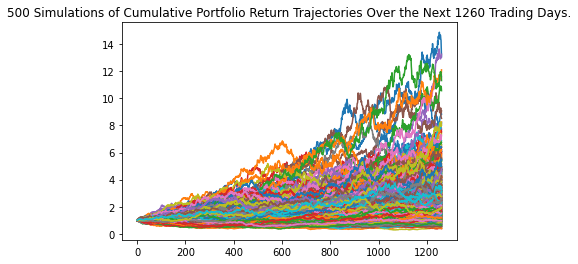

In [29]:
mc_even_5y_paytech = MCSimulation(
    portfolio_data=paytech_df,
    weights=[.33, .33, .33],
    num_simulation=500,
    num_trading_days=252*5
)

mc_even_5y_paytech.calc_cumulative_return()
mc_even_5y_paytech.plot_simulation()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

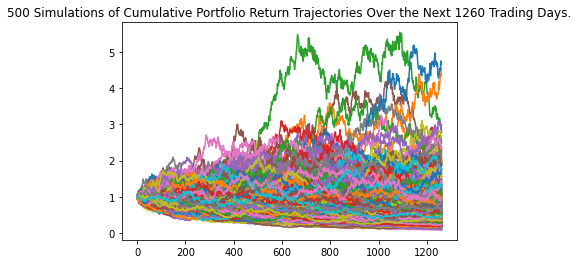

In [30]:
mc_even_5y_lending = MCSimulation(
    portfolio_data=lending_df,
    weights=[.33, .33, .33],
    num_simulation=500,
    num_trading_days=252*5
)

mc_even_5y_lending.calc_cumulative_return()
mc_even_5y_lending.plot_simulation()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

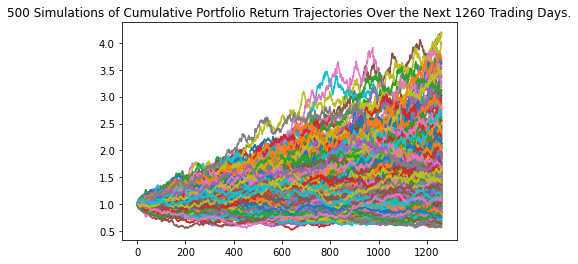

In [31]:
mc_even_5y_banking = MCSimulation(
    portfolio_data=banking_df,
    weights=[.33, .33, .33],
    num_simulation=500,
    num_trading_days=252*5
)

mc_even_5y_banking.calc_cumulative_return()
mc_even_5y_banking.plot_simulation()

### Run 5-year Monte Carlo simulations with uneven weight distributions (higher percentages for higher Sharpe ratios)

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

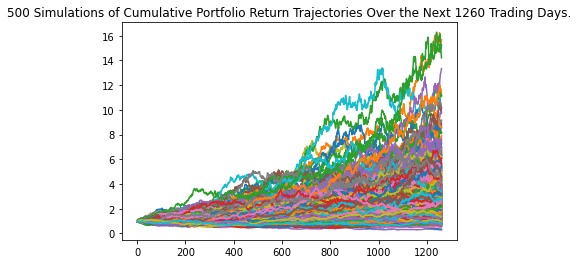

In [32]:
mc_uneven_5y_paytech = MCSimulation(
    portfolio_data=paytech_df,
    weights=[.20, .30, .50],
    num_simulation=500,
    num_trading_days=252*5
)

mc_uneven_5y_paytech.calc_cumulative_return()
mc_uneven_5y_paytech.plot_simulation()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

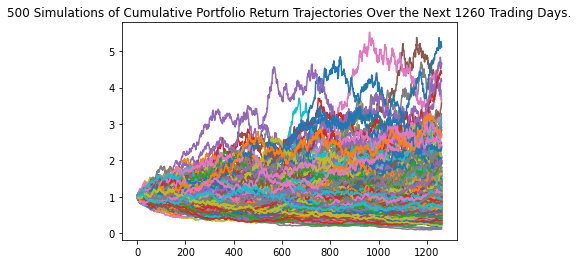

In [33]:
mc_uneven_5y_lending = MCSimulation(
    portfolio_data=lending_df,
    weights=[.20, .30, .50],
    num_simulation=500,
    num_trading_days=252*5
)

mc_uneven_5y_lending.calc_cumulative_return()
mc_uneven_5y_lending.plot_simulation()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

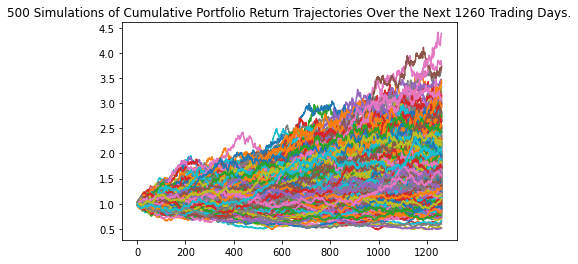

In [34]:
mc_uneven_5y_banking = MCSimulation(
    portfolio_data=banking_df,
    weights=[.30, .50, .20],
    num_simulation=500,
    num_trading_days=252*5
)

mc_uneven_5y_banking.calc_cumulative_return()
mc_uneven_5y_banking.plot_simulation()

### Run 1-year Monte Carlo simulations with even weight distributions

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

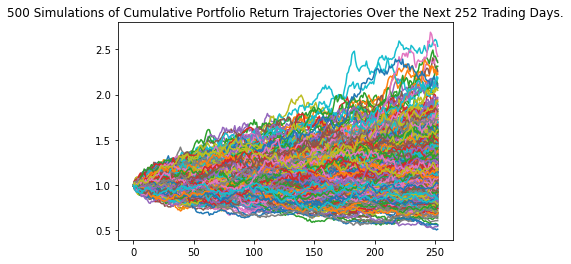

In [35]:
mc_even_1y_paytech = MCSimulation(
    portfolio_data=paytech_df,
    weights=[.33, .33, .33],
    num_simulation=500,
    num_trading_days=252*1
)

mc_even_1y_paytech.calc_cumulative_return()
mc_even_1y_paytech.plot_simulation()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

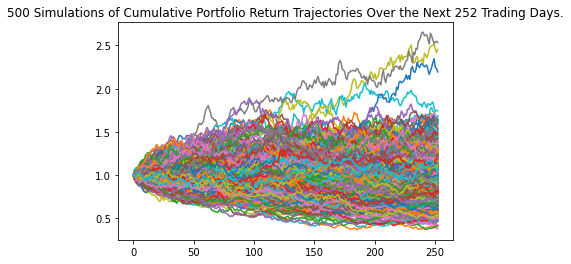

In [36]:
mc_even_1y_lending = MCSimulation(
    portfolio_data=lending_df,
    weights=[.33, .33, .33],
    num_simulation=500,
    num_trading_days=252*1
)

mc_even_1y_lending.calc_cumulative_return()
mc_even_1y_lending.plot_simulation()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

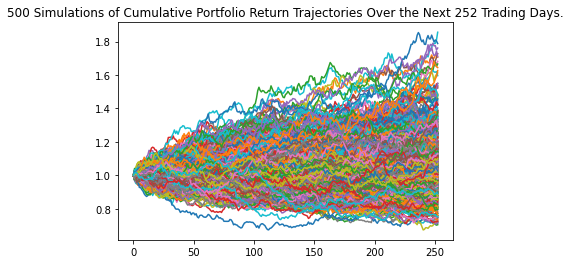

In [37]:
mc_even_1y_banking = MCSimulation(
    portfolio_data=banking_df,
    weights=[.33, .33, .33],
    num_simulation=500,
    num_trading_days=252*1
)

mc_even_1y_banking.calc_cumulative_return()
mc_even_1y_banking.plot_simulation()

### Run 1-year Monte Carlo simulations with uneven weight distributions (higher percentages for higher Sharpe ratios)

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

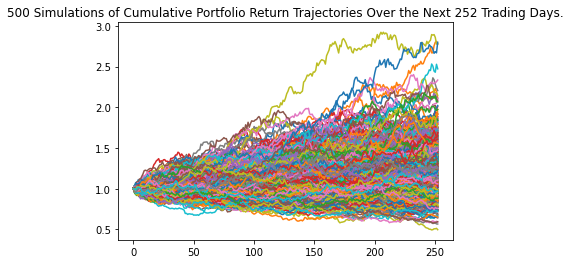

In [38]:
mc_uneven_1y_paytech = MCSimulation(
    portfolio_data=paytech_df,
    weights=[.20, .30, .50],
    num_simulation=500,
    num_trading_days=252*1
)

mc_uneven_1y_paytech.calc_cumulative_return()
mc_uneven_1y_paytech.plot_simulation()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

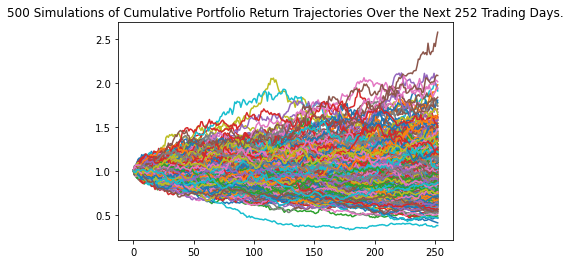

In [39]:
mc_uneven_1y_lending = MCSimulation(
    portfolio_data=lending_df,
    weights=[.20, .30, .50],
    num_simulation=500,
    num_trading_days=252*1
)

mc_uneven_1y_lending.calc_cumulative_return()
mc_uneven_1y_lending.plot_simulation()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

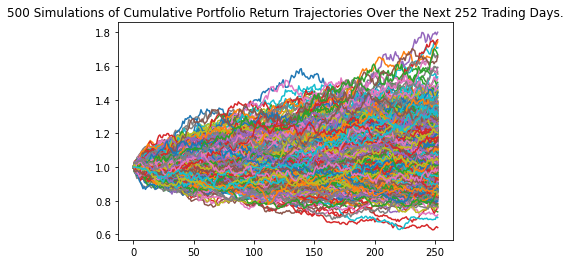

In [40]:
mc_uneven_1y_banking = MCSimulation(
    portfolio_data=banking_df,
    weights=[.30, .50, .20],
    num_simulation=500,
    num_trading_days=252*1
)

mc_uneven_1y_banking.calc_cumulative_return()
mc_uneven_1y_banking.plot_simulation()

## Analyze the 95 percent confidence intervals of all the Monte Carlo simulations assuming a \\$10,000 dollar current value of each portfolio

In [41]:
def print_confidence_intervals(mc_sims, current_value):
    """
    Prints out the 95% confidence intervals of each MCSimulation object provided in mc_sims
    
    Parameters
    ----------
    mc_sims: list(MCSimulation)
        list of MCSimulation objects that hold meta data for each of the ran MC simulations 
    current_value: int
        the hypothetical current value of the portfolio made up of the stocks in each sector 
    """
    
    for mc_sim in mc_sims:
        print(f'The portfolio of {mc_sim.portfolio_data.columns.get_level_values(0).unique().values} with a {mc_sim.weights} weight distribution will end within the range of'
              f' ${mc_sim.summarize_cumulative_return()[8] * current_value:,.2f} and ${mc_sim.summarize_cumulative_return()[9] * current_value:,.2f}.')
        print('\n')

### 5-year confidence intervals assuming a current portfolio value of $10,000 and even weight distribution

In [42]:
print_confidence_intervals([mc_even_5y_paytech, mc_even_5y_lending, mc_even_5y_banking,], 10000)

The portfolio of ['PYPL' 'SQ' 'MA'] with a [0.33, 0.33, 0.33] weight distribution will end within the range of $6,499.80 and $78,688.37.


The portfolio of ['TREE' 'LC' 'BKI'] with a [0.33, 0.33, 0.33] weight distribution will end within the range of $1,593.85 and $21,256.01.


The portfolio of ['FISV' 'JKHY' 'FIS'] with a [0.33, 0.33, 0.33] weight distribution will end within the range of $7,171.94 and $33,287.11.




### 5-year confidence intervals assuming a current portfolio value of $10,000 and uneven weight distribution

In [43]:
print_confidence_intervals([mc_uneven_5y_paytech, mc_uneven_5y_lending, mc_uneven_5y_banking,], 10000)

The portfolio of ['PYPL' 'SQ' 'MA'] with a [0.2, 0.3, 0.5] weight distribution will end within the range of $7,442.07 and $85,857.54.


The portfolio of ['TREE' 'LC' 'BKI'] with a [0.2, 0.3, 0.5] weight distribution will end within the range of $2,639.12 and $28,992.35.


The portfolio of ['FISV' 'JKHY' 'FIS'] with a [0.3, 0.5, 0.2] weight distribution will end within the range of $7,752.51 and $31,201.53.




### 1-year confidence intervals assuming a current portfolio value of $10,000 and even weight distribution

In [44]:
print_confidence_intervals([mc_even_1y_paytech, mc_even_1y_lending, mc_even_1y_banking,], 10000)

The portfolio of ['PYPL' 'SQ' 'MA'] with a [0.33, 0.33, 0.33] weight distribution will end within the range of $6,889.66 and $20,823.82.


The portfolio of ['TREE' 'LC' 'BKI'] with a [0.33, 0.33, 0.33] weight distribution will end within the range of $4,857.22 and $16,097.77.


The portfolio of ['FISV' 'JKHY' 'FIS'] with a [0.33, 0.33, 0.33] weight distribution will end within the range of $7,521.87 and $15,492.58.




### 1-year confidence intervals assuming a current portfolio value of $10,000 and uneven weight distribution

In [45]:
print_confidence_intervals([mc_uneven_1y_paytech, mc_uneven_1y_lending, mc_uneven_1y_banking,], 10000)

The portfolio of ['PYPL' 'SQ' 'MA'] with a [0.2, 0.3, 0.5] weight distribution will end within the range of $7,198.59 and $20,162.20.


The portfolio of ['TREE' 'LC' 'BKI'] with a [0.2, 0.3, 0.5] weight distribution will end within the range of $5,495.57 and $17,219.87.


The portfolio of ['FISV' 'JKHY' 'FIS'] with a [0.3, 0.5, 0.2] weight distribution will end within the range of $7,913.24 and $15,299.09.




## Construct a custom portfolio with best performing stocks

### Analyze the annualized average return and cumulative returns for the average daily returns of the portfolio

In [46]:
custom_portfolio_tickers = yf.Tickers('ma sq bki fisv jkhy')
custom_portfolio_daily_returns = get_daily_returns_df(custom_portfolio_tickers, ['MA', 'SQ', 'BKI', 'FISV', 'JKHY'], '5y')

MA DataFame


Open        High         Low       Close  \
Date                                                                        
2017-12-11 00:00:00-05:00  146.207692  147.210180  146.090902  146.850067   
2017-12-12 00:00:00-05:00  146.801410  149.623947  146.587285  148.426804   
2017-12-13 00:00:00-05:00  148.426791  149.341686  147.609230  147.638428   
2017-12-14 00:00:00-05:00  147.862266  149.448734  147.726006  147.871994   
2017-12-15 00:00:00-05:00  148.572797  149.516890  146.830613  149.302765   

                            Volume  Dividends  Stock Splits  
Date                                                         
2017-12-11 00:00:00-05:00  3394800        0.0             0  
2017-12-12 00:00:00-05:00  3360300        0.0             0  
2017-12-13 00:00:00-05:00  3618700        0.0             0  
2017-12-14 00:00:00-05:00  3016700        0.0             0  
2017-12-15 00:00:00-05:00  5067300        0.0             0

Open        High         Low       Close  \
Date                                                                        
2022-12-05 00:00:00-05:00  356.000000  358.899994  354.450012  356.089996   
2022-12-06 00:00:00-05:00  353.820007  355.000000  344.350006  347.529999   
2022-12-07 00:00:00-05:00  346.880005  347.850006  341.470001  347.420013   
2022-12-08 00:00:00-05:00  350.000000  352.170013  347.220001  351.170013   
2022-12-09 00:00:00-05:00  348.399994  352.769989  347.359985  348.829987   

                            Volume  Dividends  Stock Splits  
Date                                                         
2022-12-05 00:00:00-05:00  2202500        0.0             0  
2022-12-06 00:00:00-05:00  2353300        0.0             0  
2022-12-07 00:00:00-05:00  2454300        0.0             0  
2022-12-08 00:00:00-05:00  1998600        0.0             0  
2022-12-09 00:00:00-05:00  2301100        0.0             0

SQ DataFame


Open       High        Low      Close  \
Date                                                                    
2017-12-11 00:00:00-05:00  38.150002  38.680000  37.700001  38.299999   
2017-12-12 00:00:00-05:00  38.070000  39.639999  37.930000  38.080002   
2017-12-13 00:00:00-05:00  38.169998  38.450001  36.070000  36.189999   
2017-12-14 00:00:00-05:00  35.849998  37.540001  35.799999  37.009998   
2017-12-15 00:00:00-05:00  37.299999  37.653000  36.869999  37.029999   

                             Volume  Dividends  Stock Splits  
Date                                                          
2017-12-11 00:00:00-05:00  15780200          0             0  
2017-12-12 00:00:00-05:00  18834100          0             0  
2017-12-13 00:00:00-05:00  25376200          0             0  
2017-12-14 00:00:00-05:00  20939500          0             0  
2017-12-15 00:00:00-05:00  12932000          0             0

Open       High        Low      Close  \
Date                                                                    
2022-12-05 00:00:00-05:00  67.400002  67.860001  62.400002  63.139999   
2022-12-06 00:00:00-05:00  63.119999  63.879002  60.200001  61.299999   
2022-12-07 00:00:00-05:00  60.830002  61.849998  59.625000  61.070000   
2022-12-08 00:00:00-05:00  61.599998  63.700001  60.500000  63.369999   
2022-12-09 00:00:00-05:00  63.099998  65.830002  63.099998  64.599998   

                             Volume  Dividends  Stock Splits  
Date                                                          
2022-12-05 00:00:00-05:00  12610900          0             0  
2022-12-06 00:00:00-05:00   9408900          0             0  
2022-12-07 00:00:00-05:00   8734800          0             0  
2022-12-08 00:00:00-05:00   7849800          0             0  
2022-12-09 00:00:00-05:00   8414800          0             0

BKI DataFame


Open       High        Low      Close  \
Date                                                                    
2017-12-11 00:00:00-05:00  45.500000  45.900002  45.275002  45.599998   
2017-12-12 00:00:00-05:00  45.500000  45.549999  45.049999  45.099998   
2017-12-13 00:00:00-05:00  45.099998  45.549999  44.849998  45.400002   
2017-12-14 00:00:00-05:00  45.250000  45.799999  44.875000  45.250000   
2017-12-15 00:00:00-05:00  45.299999  45.599998  44.650002  45.049999   

                            Volume  Dividends  Stock Splits  
Date                                                         
2017-12-11 00:00:00-05:00   506100          0             0  
2017-12-12 00:00:00-05:00   240900          0             0  
2017-12-13 00:00:00-05:00   595400          0             0  
2017-12-14 00:00:00-05:00   976300          0             0  
2017-12-15 00:00:00-05:00  1381000          0             0

Open       High        Low      Close  Volume  \
Date                                                                            
2022-12-05 00:00:00-05:00  60.950001  61.000000  59.808998  59.970001  745000   
2022-12-06 00:00:00-05:00  59.860001  60.040001  59.130001  59.290001  592800   
2022-12-07 00:00:00-05:00  59.180000  59.709999  57.799999  59.080002  616300   
2022-12-08 00:00:00-05:00  58.919998  60.520000  58.657001  60.259998  555500   
2022-12-09 00:00:00-05:00  60.130001  60.950001  59.830002  59.889999  551800   

                           Dividends  Stock Splits  
Date                                                
2022-12-05 00:00:00-05:00          0             0  
2022-12-06 00:00:00-05:00          0             0  
2022-12-07 00:00:00-05:00          0             0  
2022-12-08 00:00:00-05:00          0             0  
2022-12-09 00:00:00-05:00          0             0

FISV DataFame


Open       High        Low      Close  \
Date                                                                    
2017-12-11 00:00:00-05:00  65.699997  65.915001  65.565002  65.915001   
2017-12-12 00:00:00-05:00  66.000000  66.160004  65.544998  65.599998   
2017-12-13 00:00:00-05:00  65.730003  66.035004  65.139999  65.404999   
2017-12-14 00:00:00-05:00  65.370003  65.500000  64.919998  64.949997   
2017-12-15 00:00:00-05:00  65.480003  66.139999  64.705002  65.980003   

                            Volume  Dividends  Stock Splits  
Date                                                         
2017-12-11 00:00:00-05:00  1514400          0           0.0  
2017-12-12 00:00:00-05:00  1252000          0           0.0  
2017-12-13 00:00:00-05:00  1732000          0           0.0  
2017-12-14 00:00:00-05:00  1519400          0           0.0  
2017-12-15 00:00:00-05:00  3525600          0           0.0

Open        High         Low       Close  \
Date                                                                        
2022-12-05 00:00:00-05:00  104.750000  104.750000  101.629997  102.190002   
2022-12-06 00:00:00-05:00  102.540001  102.610001   99.910004  100.349998   
2022-12-07 00:00:00-05:00  100.610001  101.150002   99.559998  100.489998   
2022-12-08 00:00:00-05:00  100.980003  102.080002  100.510002  101.459999   
2022-12-09 00:00:00-05:00  101.040001  101.860001  100.570000  100.639999   

                            Volume  Dividends  Stock Splits  
Date                                                         
2022-12-05 00:00:00-05:00  3411800          0           0.0  
2022-12-06 00:00:00-05:00  2342200          0           0.0  
2022-12-07 00:00:00-05:00  2361700          0           0.0  
2022-12-08 00:00:00-05:00  2063200          0           0.0  
2022-12-09 00:00:00-05:00  1763300          0           0.0

JKHY DataFame


Open        High         Low       Close  \
Date                                                                        
2017-12-11 00:00:00-05:00  110.818523  111.272778  110.402131  110.619789   
2017-12-12 00:00:00-05:00  110.695500  110.913158  109.966800  110.070900   
2017-12-13 00:00:00-05:00  110.014111  110.932080  109.805911  110.033035   
2017-12-14 00:00:00-05:00  110.061436  110.818518  109.730205  109.834305   
2017-12-15 00:00:00-05:00  110.099265  112.067691  109.947852  111.897346   

                           Volume  Dividends  Stock Splits  
Date                                                        
2017-12-11 00:00:00-05:00  219600        0.0             0  
2017-12-12 00:00:00-05:00  216500        0.0             0  
2017-12-13 00:00:00-05:00  273500        0.0             0  
2017-12-14 00:00:00-05:00  282100        0.0             0  
2017-12-15 00:00:00-05:00  559700        0.0             0

Open        High         Low       Close  \
Date                                                                        
2022-12-05 00:00:00-05:00  190.729996  190.860001  188.490005  188.929993   
2022-12-06 00:00:00-05:00  188.500000  188.610001  182.690002  183.490005   
2022-12-07 00:00:00-05:00  183.960007  186.059998  183.000000  184.779999   
2022-12-08 00:00:00-05:00  184.690002  185.580002  183.100006  184.919998   
2022-12-09 00:00:00-05:00  184.410004  184.949997  181.250000  181.539993   

                           Volume  Dividends  Stock Splits  
Date                                                        
2022-12-05 00:00:00-05:00  388000        0.0             0  
2022-12-06 00:00:00-05:00  445900        0.0             0  
2022-12-07 00:00:00-05:00  377600        0.0             0  
2022-12-08 00:00:00-05:00  363000        0.0             0  
2022-12-09 00:00:00-05:00  580300        0.0             0



Closing price DataFrame for ['MA', 'SQ', 'BKI', 'FISV', 'JKHY']


MA         SQ        BKI       FISV  \
Date                                                                     
2017-12-11 00:00:00-05:00  146.850067  38.299999  45.599998  65.915001   
2017-12-12 00:00:00-05:00  148.426804  38.080002  45.099998  65.599998   
2017-12-13 00:00:00-05:00  147.638428  36.189999  45.400002  65.404999   
2017-12-14 00:00:00-05:00  147.871994  37.009998  45.250000  64.949997   
2017-12-15 00:00:00-05:00  149.302765  37.029999  45.049999  65.980003   

                                 JKHY  
Date                                   
2017-12-11 00:00:00-05:00  110.619789  
2017-12-12 00:00:00-05:00  110.070900  
2017-12-13 00:00:00-05:00  110.033035  
2017-12-14 00:00:00-05:00  109.834305  
2017-12-15 00:00:00-05:00  111.897346

MA         SQ        BKI        FISV  \
Date                                                                      
2022-12-05 00:00:00-05:00  356.089996  63.139999  59.970001  102.190002   
2022-12-06 00:00:00-05:00  347.529999  61.299999  59.290001  100.349998   
2022-12-07 00:00:00-05:00  347.420013  61.070000  59.080002  100.489998   
2022-12-08 00:00:00-05:00  351.170013  63.369999  60.259998  101.459999   
2022-12-09 00:00:00-05:00  348.829987  64.599998  59.889999  100.639999   

                                 JKHY  
Date                                   
2022-12-05 00:00:00-05:00  188.929993  
2022-12-06 00:00:00-05:00  183.490005  
2022-12-07 00:00:00-05:00  184.779999  
2022-12-08 00:00:00-05:00  184.919998  
2022-12-09 00:00:00-05:00  181.539993



Daily returns DataFrame for ['MA', 'SQ', 'BKI', 'FISV', 'JKHY']


MA        SQ       BKI      FISV      JKHY
Date                                                                       
2017-12-12 00:00:00-05:00  0.010737 -0.005744 -0.010965 -0.004779 -0.004962
2017-12-13 00:00:00-05:00 -0.005312 -0.049632  0.006652 -0.002973 -0.000344
2017-12-14 00:00:00-05:00  0.001582  0.022658 -0.003304 -0.006957 -0.001806
2017-12-15 00:00:00-05:00  0.009676  0.000540 -0.004420  0.015858  0.018783
2017-12-18 00:00:00-05:00 -0.001825  0.019444 -0.006659  0.002880  0.000339

MA        SQ       BKI      FISV      JKHY
Date                                                                       
2022-12-05 00:00:00-05:00 -0.011026 -0.073922 -0.023131 -0.031007 -0.013935
2022-12-06 00:00:00-05:00 -0.024039 -0.029142 -0.011339 -0.018006 -0.028794
2022-12-07 00:00:00-05:00 -0.000316 -0.003752 -0.003542  0.001395  0.007030
2022-12-08 00:00:00-05:00  0.010794  0.037662  0.019973  0.009653  0.000758
2022-12-09 00:00:00-05:00 -0.006664  0.019410 -0.006140 -0.008082 -0.018278

In [47]:
custom_portfolio_daily_returns = custom_portfolio_daily_returns.mean(axis=1)

print(f'Annualized average return for custom portfolio: {custom_portfolio_daily_returns.mean() * 252 * 100: .2f}')

Annualized average return for custom portfolio:  18.01


In [48]:
custom_portfolio_cumulative_returns = (1 + custom_portfolio_daily_returns).cumprod()
print(f'Cumulative return for custom portfolio: {(custom_portfolio_cumulative_returns.iloc[-1]): .2f}')

Cumulative return for custom portfolio:  2.00


In [49]:
custom_portfolio_cumulative_returns.hvplot(
    title='Custom Portfolio Cumulative Returns 2017-2022', 
    frame_width=700, 
    frame_height=400
)

:Curve   [Date]   (0)

### Monte Carlo simulations using the custom portfolio

In [50]:
custom_portfolio_mcsim_data = get_data_for_mcsim(custom_portfolio_tickers, ['MA', 'SQ', 'BKI', 'FISV', 'JKHY'], '5y')

MA                                      \
                                 Open        High         Low       close   
Date                                                                        
2017-12-11 00:00:00-05:00  146.207707  147.210195  146.090917  146.850082   
2017-12-12 00:00:00-05:00  146.801380  149.623916  146.587255  148.426773   
2017-12-13 00:00:00-05:00  148.426806  149.341701  147.609245  147.638443   
2017-12-14 00:00:00-05:00  147.862312  149.448781  147.726052  147.872040   
2017-12-15 00:00:00-05:00  148.572812  149.516905  146.830628  149.302780   

                                           SQ                        \
                            Volume       Open       High        Low   
Date                                                                  
2017-12-11 00:00:00-05:00  3394800  38.150002  38.680000  37.700001   
2017-12-12 00:00:00-05:00  3360300  38.070000  39.639999  37.930000   
2017-12-13 00:00:00-05:00  3618700  38.169998  38.450001  36.070000   
2017-12-14 00:00:00-05:00  3016700  35.849998  37.540001  35.799999   
2017-12-15 00:00:00-05:00  5067300  37.299999  37.653000  36.869999   

                                                ...       FISV             \
                               close    Volume  ...       Open       High   
Date                                            ...                         
2017-12-11 00:00:00-05:00  38.299999  15780200  ...  65.699997  65.915001   
2017-12-12 00:00:00-05:00  38.080002  18834100  ...  66.000000  66.160004   
2017-12-13 00:00:00-05:00  36.189999  25376200  ...  65.730003  66.035004   
2017-12-14 00:00:00-05:00  37.009998  20939500  ...  65.370003  65.500000   
2017-12-15 00:00:00-05:00  37.029999  12932000  ...  65.480003  66.139999   

                                                                JKHY  \
                                 Low      close   Volume        Open   
Date                                                                   
2017-12-11 00:00:00-05:00  65.565002  65.915001  1514400  110.818523   
2017-12-12 00:00:00-05:00  65.544998  65.599998  1252000  110.695492   
2017-12-13 00:00:00-05:00  65.139999  65.404999  1732000  110.014119   
2017-12-14 00:00:00-05:00  64.919998  64.949997  1519400  110.061436   
2017-12-15 00:00:00-05:00  64.705002  65.980003  3525600  110.099273   

                                                                       
                                 High         Low       close  Volume  
Date                                                                   
2017-12-11 00:00:00-05:00  111.272778  110.402131  110.619789  219600  
2017-12-12 00:00:00-05:00  110.913150  109.966792  110.070892  216500  
2017-12-13 00:00:00-05:00  110.932087  109.805919  110.033043  273500  
2017-12-14 00:00:00-05:00  110.818518  109.730205  109.834305  282100  
2017-12-15 00:00:00-05:00  112.067699  109.947859  111.897354  559700  

[5 rows x 25 columns]

MA                                      \
                                 Open        High         Low       close   
Date                                                                        
2022-12-05 00:00:00-05:00  356.000000  358.899994  354.450012  356.089996   
2022-12-06 00:00:00-05:00  353.820007  355.000000  344.350006  347.529999   
2022-12-07 00:00:00-05:00  346.880005  347.850006  341.470001  347.420013   
2022-12-08 00:00:00-05:00  350.000000  352.170013  347.220001  351.170013   
2022-12-09 00:00:00-05:00  348.399994  352.769989  347.359985  348.829987   

                                           SQ                        \
                            Volume       Open       High        Low   
Date                                                                  
2022-12-05 00:00:00-05:00  2202500  67.400002  67.860001  62.400002   
2022-12-06 00:00:00-05:00  2353300  63.119999  63.879002  60.200001   
2022-12-07 00:00:00-05:00  2454300  60.830002  61.849998  59.625000   
2022-12-08 00:00:00-05:00  1998600  61.599998  63.700001  60.500000   
2022-12-09 00:00:00-05:00  2301100  63.099998  65.830002  63.099998   

                                                ...        FISV              \
                               close    Volume  ...        Open        High   
Date                                            ...                           
2022-12-05 00:00:00-05:00  63.139999  12610900  ...  104.750000  104.750000   
2022-12-06 00:00:00-05:00  61.299999   9408900  ...  102.540001  102.610001   
2022-12-07 00:00:00-05:00  61.070000   8734800  ...  100.610001  101.150002   
2022-12-08 00:00:00-05:00  63.369999   7849800  ...  100.980003  102.080002   
2022-12-09 00:00:00-05:00  64.599998   8414800  ...  101.040001  101.860001   

                                                                  JKHY  \
                                  Low       close   Volume        Open   
Date                                                                     
2022-12-05 00:00:00-05:00  101.629997  102.190002  3411800  190.729996   
2022-12-06 00:00:00-05:00   99.910004  100.349998  2342200  188.500000   
2022-12-07 00:00:00-05:00   99.559998  100.489998  2361700  183.960007   
2022-12-08 00:00:00-05:00  100.510002  101.459999  2063200  184.690002   
2022-12-09 00:00:00-05:00  100.570000  100.639999  1763300  184.410004   

                                                                       
                                 High         Low       close  Volume  
Date                                                                   
2022-12-05 00:00:00-05:00  190.860001  188.490005  188.929993  388000  
2022-12-06 00:00:00-05:00  188.610001  182.690002  183.490005  445900  
2022-12-07 00:00:00-05:00  186.059998  183.000000  184.779999  377600  
2022-12-08 00:00:00-05:00  185.580002  183.100006  184.919998  363000  
2022-12-09 00:00:00-05:00  184.949997  181.250000  181.539993  580300  

[5 rows x 25 columns]

#### 5-year simulations with even and uneven weight distributions

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

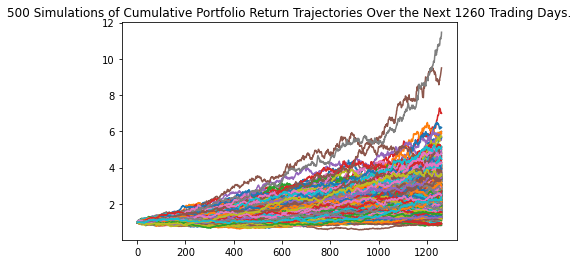

In [51]:
mc_even_5y_custom = MCSimulation(
    portfolio_data=custom_portfolio_mcsim_data,
    weights=[0.20, 0.20, 0.20, 0.20, 0.20],
    num_simulation=500,
    num_trading_days=252*5
)

mc_even_5y_custom.calc_cumulative_return()
mc_even_5y_custom.plot_simulation()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

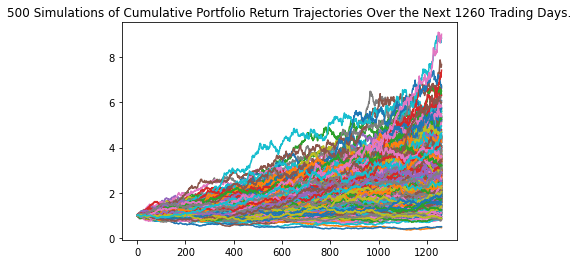

In [52]:
mc_uneven_5y_custom = MCSimulation(
    portfolio_data=custom_portfolio_mcsim_data,
    weights=[0.30, 0.25, 0.20, 0.15, 0.10],
    num_simulation=500,
    num_trading_days=252*5
)

mc_uneven_5y_custom.calc_cumulative_return()
mc_uneven_5y_custom.plot_simulation()

#### 1-year simulations with even and uneven weight distributions

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

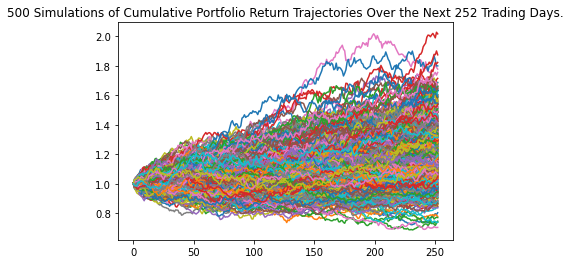

In [53]:
mc_even_1y_custom = MCSimulation(
    portfolio_data=custom_portfolio_mcsim_data,
    weights=[0.20, 0.20, 0.20, 0.20, 0.20],
    num_simulation=500,
    num_trading_days=252*1
)

mc_even_1y_custom.calc_cumulative_return()
mc_even_1y_custom.plot_simulation()

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

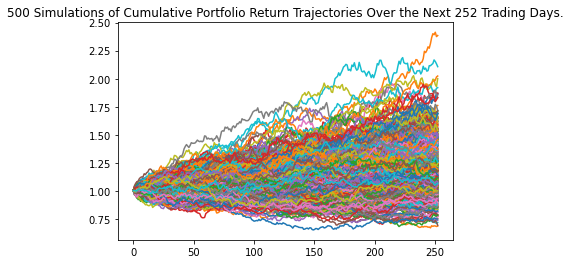

In [54]:
mc_uneven_1y_custom = MCSimulation(
    portfolio_data=custom_portfolio_mcsim_data,
    weights=[0.30, 0.25, 0.20, 0.15, 0.10],
    num_simulation=500,
    num_trading_days=252*1
)

mc_uneven_1y_custom.calc_cumulative_return()
mc_uneven_1y_custom.plot_simulation()

### 95 percent confidence intervals using the custom portfolio

In [55]:
print_confidence_intervals([mc_even_5y_custom, mc_uneven_5y_custom], 10000)

The portfolio of ['MA' 'SQ' 'BKI' 'FISV' 'JKHY'] with a [0.2, 0.2, 0.2, 0.2, 0.2] weight distribution will end within the range of $11,908.66 and $51,010.10.


The portfolio of ['MA' 'SQ' 'BKI' 'FISV' 'JKHY'] with a [0.3, 0.25, 0.2, 0.15, 0.1] weight distribution will end within the range of $9,881.21 and $58,053.08.




In [56]:
print_confidence_intervals([mc_even_1y_custom, mc_uneven_1y_custom], 10000)

The portfolio of ['MA' 'SQ' 'BKI' 'FISV' 'JKHY'] with a [0.2, 0.2, 0.2, 0.2, 0.2] weight distribution will end within the range of $8,612.18 and $16,535.58.


The portfolio of ['MA' 'SQ' 'BKI' 'FISV' 'JKHY'] with a [0.3, 0.25, 0.2, 0.15, 0.1] weight distribution will end within the range of $7,945.15 and $17,400.29.


